<img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=twitter" width=500px>

# Google Store App Rating Prediction

### Context

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable.  It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful.
We can collect app data and user ratings from the app stores and use it to extract insightful information.
A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 

### Objective
The Goal is to predict the rating for an app based on the given input features like size, number of downloads etc.

### Data Set Information
Web scraped data of 10k Play Store apps for analysing the Android market. Each app (row) has values for category, rating, size, and more.

#### Attributes:- 
- **App:** Application name
- **Category:** Category the app belongs to
- **Rating:** Overall user rating of the app 
- **Reviews:** Number of user reviews for the app
- **Size:** Size of the app 
- **Installs:** Number of user downloads/installs for the app 
- **Type:** Paid or Free
- **Price:** Price of the app 
- **Content Rating:** Age group the app is targeted at - Children / Mature 21+ / Adult
- **Genres:** An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- **Last Updated:** Date when the app was last updated on Play Store 
- **Current Ver:** Current version of the app available on Play Store 
- **Android Ver:** Min required Android version 


### 1. Import required libraries and read the dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [10]:
# If using Google Colab

#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
#df.head()

In [11]:
df = pd.read_csv('c://pro10//Apps_data.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [12]:
## lets check first few samples.
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
## lets check the shape
df.shape

(10841, 13)

In [14]:
## lets check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## EDA and Preprocessing

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [15]:
## Lets check the summary statistics for all the columns.
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
- App : 9660 unique values. Top value seems to ROBOLOX. We could have duplicate entries here.
- Category - There are 34 categories and 120 genres. Family is a Top category. 
- Rating - min value is 1 and max is 19 ( which seems like a miss)
- Reviews - there are ~600 apps with zero reviews
- Size - Many app size varies with device and rest are inn MBs
- Installs - many apps have very high install count
- Type - Most of the apps are free. There are only three categories here.
- Price - More than 10k apps are free of cost
- Content Rating - Most of teh apps are for everyone
- And Ver. - 4.1 and up is reqd for most of the apps


- Type and Price could be highly correlated
- Category and Genre could be highly correlated

#### Need to be worked on before model building:
1. We can drop Last Updated, Current Ver, and Andriod Ver as they have too many categories and are not very importatnt in prediction the rating

2. App name can be dropped after doing basic analysis

3. Category Column - Important to have. Requires feature engineering

4. Reviews - Need to convert it to numeric column

5. Installs - Need to convert it to numeric column

6. Type - Convert it to numeric

7. Price - Need to remove $ from the values and make it numeric

8. Content Rating - Requires encoding

9. Genre - Important to have. Requires feature engineering to make it numeric

### 4. Check if there are any duplicate records in the dataset? if any drop them.

Let's look closely at the apps in the data 

In [16]:
# Let's look closely at the apps in the data 
df['App'].value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Duolingo: Learn Languages Free                        7
8 Ball Pool                                           7
Candy Crush Saga                                      7
ESPN                                                  7
Helix Jump                                            6
Nick                                                  6
Temple Run 2                                          6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Zombie Catchers                                       6
Subway Surfers                                        6
Bubble Shooter                                        6
Bowmasters                                            6
Bleacher Report: sports news, scores, & highlights    6
slither.io                                            6
Granny                                                5
Calorie Counter - MyFitnessPal                  

We see that few apps have more than one entries. Which tells us that there few duplicate entries for these apps.

Before we drop the app column, we will verify if these entries are really duplicate and then remove these.

Take 3 sample Apps for exploration (for eg: 'ROBLOX', 'ESPN','Nick')

In [17]:
#Taking 3 sample Apps for exploration
df[df['App'].isin(['ROBLOX', 'ESPN','Nick'])].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
917,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
2226,Nick,FAMILY,4.2,123322,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
6086,Nick,FAMILY,4.2,123309,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up


Drops other duplicate entries keeping the App with the highest reviews

In [18]:
#drops other duplicate entries keeping the App with the highest reviews
df.drop_duplicates('App',inplace=True)

verify that duplicates has been removed

In [19]:
#Let's verify that duplicates has been removed
df['App'].value_counts().head(10)

MyPlate Calorie Tracker                         1
20 Minuten (CH)                                 1
Skype - free IM & video calls                   1
DW                                              1
Map My Hike GPS Hiking                          1
Caller ID +                                     1
Rivals at War: Firefight                        1
Picture Grid Builder                            1
Hovercraft Racer                                1
HD Camera - Best Cam with filters & panorama    1
Name: App, dtype: int64

Check shape of the dataframe

In [20]:
df.shape

(9660, 13)

### 5. Check the unique categories of the column 'Category', Is there are any invalid category? If yes drop them.

Check out the App categories

In [21]:
# Let's check out the App categories
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Drop the category named 1.9, unknown category and invalid category

In [22]:
# Drop the category named 1.9, unknown category
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
# Dropping the invalid category(using its row number). Please note that we can replace it with a mode as well
df.drop([10472],inplace=True)

### 6. Check if there are missing values present in the column Rating, If any? drop them and Convert ratings to high and low categories(>3.5 is high rest low)

Drop the NaN values

In [24]:
## Dropping missing values from the target column rating
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
#convert ratings to high and low categories.
Rating_cat = dict()
for i in range(0,len(df['Rating'])):
    if df['Rating'].iloc[i] >= 3.5:
        Rating_cat[i] = 'High'
    else: Rating_cat[i] = 'Low'
        
#Add the categorical column to the data 
df = df.assign(Rating_cat = pd.Series(Rating_cat).values)

In [27]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [28]:
df['Rating_cat'].value_counts(normalize=True)*100

High    91.245421
Low      8.754579
Name: Rating_cat, dtype: float64

Plot the same

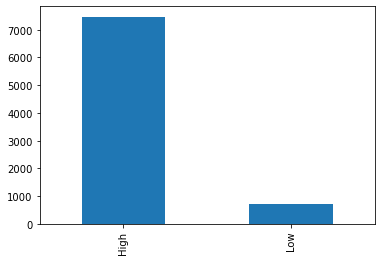

In [29]:
df['Rating_cat'].value_counts().plot(kind='bar')
plt.show()

- The target class is highly imbalanced.

### 8. Convert the column "Reviews" to numeric datatype and check the presence of outliers in the column and handle the outliers using transformation approach.

In [30]:
## datatype before conversion
df['Reviews'].dtype

dtype('O')

In [31]:
# Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df.Reviews, errors = 'coerce')

In [32]:
## datatype after conversion
df['Reviews'].dtype

dtype('int64')

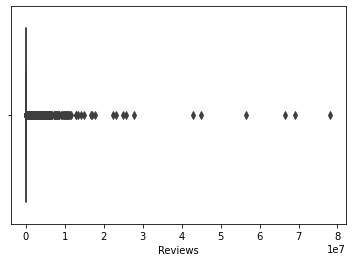

In [33]:
## check the presence of outliers
sns.boxplot(df['Reviews'])
plt.show()

- As we can observe the column reviews have high positive skewness. Lets reduce the skewness using log transformation approach.

In [34]:
## reducing skewness using log transformation approach
df['Reviews'] = np.log(df['Reviews'])

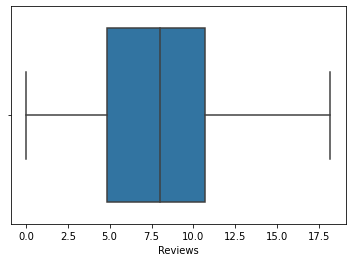

In [35]:
## Boxplot after transformation
sns.boxplot(df['Reviews'])
plt.show()

- As we can observe after log transformation the column reviews is been normally distributed and free of outliers.

### 9. The column 'Size' contain alphanumeric values, treat the non numeric data and convert the column into suitable datatype. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [36]:
df['Size'].head(5)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [37]:
## Dropping the entries where size='Varies with device'
df = df[df['Size']!='Varies with device']

Replace M with 1 million and k with 1 thousand

In [38]:
def convert(entry):
    
        if entry[-1]=='k':
            new_entry=float(entry.replace('k',''))*1000
        else:
            new_entry=float(entry.replace('M',''))*1000000
        return new_entry

In [39]:
## applying the above function to column 'Size'
df['Size']= df['Size'].apply(lambda x : convert(x))

In [40]:
df['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

### 10. Check the column 'Installs',  treat the unwanted characters and convert the column into suitable dataype.

In [41]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

- We can observe **,** and **+**,lets remove those 

In [42]:
# Replacing , and + 
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','')

In [43]:
# Convert to numeric type
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [44]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

### 11. Check the column 'Price' remove the unwanted characters and convert the column into suitable datatype.

In [45]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

Replace $ with space

In [46]:
df['Price'] = df['Price'].str.replace('$', '')

convert column to numeric, dropping non numeric values

In [47]:
# convert column to numeric, dropping non numeric values
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [48]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

## Data Preparation for Model Building

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) will use that as target.)

Drop 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns

In [49]:
df = df.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)

In [50]:
df.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_cat
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,High


### 13. For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0

In [51]:
df['Rating_cat'] = df['Rating_cat'].replace({'High':1,'Low':0})

In [52]:
df['Rating_cat'].unique()

array([1, 0], dtype=int64)

### 14. Encode the categorical columns

In [53]:
df.dtypes

Category           object
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Rating_cat          int64
dtype: object

In [54]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [55]:
df.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_cat
0,0,5.068904,19000000.0,10000,0,0.0,1,1
1,0,6.874198,14000000.0,500000,0,0.0,1,1


### 15. Segregate the target and independent features

In [56]:
X = df.drop('Rating_cat',axis=1)
y = df['Rating_cat']

### 16. Split the dataset into train and test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4914, 7) (2107, 7)
(4914,) (2107,)


### 16. Standardize the data, so that the values are within a particular range.

In [58]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.

mm = MinMaxScaler()

X_train.iloc[:,:] = mm.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = mm.transform(X_test.iloc[:,:])

In [59]:
## just checking few samples after scaling
X_train.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2842,0.7500,0.476262,0.044919,0.00200,0.0,0.000000,0.2
6534,0.4375,0.354274,0.058920,0.00001,1.0,0.017475,0.8


In [60]:
## just checking few sample after sacling
X_test.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating
6285,0.84375,0.627872,0.109924,0.0020,0.0,0.0,0.6
4305,0.43750,0.440562,0.619968,0.0002,0.0,0.0,0.2


## Model Building

### Classification

### 17. Write a function to fit and print the model predictions, input parameters would be model, train and test data

In [61]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    
    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(train_score)
    
    print(test_score)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

### 18. Use the above function and train a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models and make predictions on test data and evaluate the models

### Decision Trees

Pass decision tree model into the function 

In [62]:
dt = DecisionTreeClassifier()

fit_n_print(dt, X_train, X_test, y_train, y_test)

0.9997964997964998
0.8457522543901281
[[  40  156]
 [ 169 1742]]
              precision    recall  f1-score   support

           0       0.19      0.20      0.20       196
           1       0.92      0.91      0.91      1911

    accuracy                           0.85      2107
   macro avg       0.55      0.56      0.56      2107
weighted avg       0.85      0.85      0.85      2107



Check feature importance

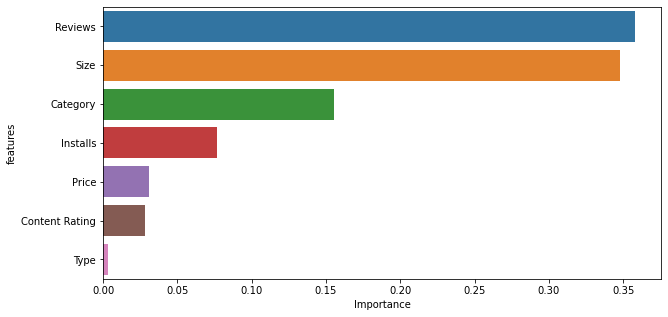

In [63]:
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

### Random Forest

Pass Random forest model into the function

In [64]:
rf = RandomForestClassifier()

fit_n_print(rf, X_train, X_test, y_train, y_test)

0.9987789987789988
0.9017560512577124
[[   8  188]
 [  19 1892]]
              precision    recall  f1-score   support

           0       0.30      0.04      0.07       196
           1       0.91      0.99      0.95      1911

    accuracy                           0.90      2107
   macro avg       0.60      0.52      0.51      2107
weighted avg       0.85      0.90      0.87      2107



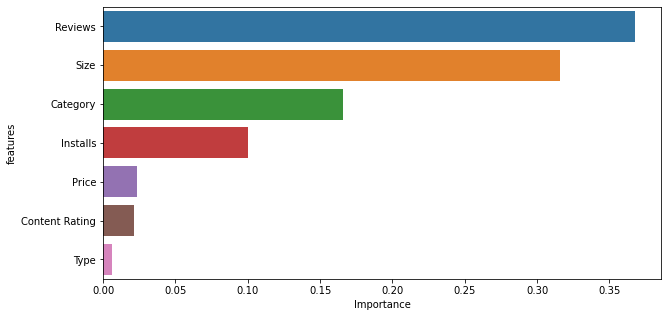

In [65]:
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

### Bagging Classifier

Pass bagging classifier model into the function

In [66]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()

fit_n_print(bg, X_train, X_test, y_train, y_test)

0.9930809930809931
0.8789748457522544
[[  22  174]
 [  81 1830]]
              precision    recall  f1-score   support

           0       0.21      0.11      0.15       196
           1       0.91      0.96      0.93      1911

    accuracy                           0.88      2107
   macro avg       0.56      0.53      0.54      2107
weighted avg       0.85      0.88      0.86      2107



### Gradient Boosting

Pass Gradient boosting model into the function

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

fit_n_print(gb, X_train, X_test, y_train, y_test)

0.9074074074074074
0.9060275272899858
[[   1  195]
 [   3 1908]]
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       196
           1       0.91      1.00      0.95      1911

    accuracy                           0.91      2107
   macro avg       0.58      0.50      0.48      2107
weighted avg       0.85      0.91      0.86      2107



### AdaBoosting

Pass AdaBoosting model into the function

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

fit_n_print(ab, X_train, X_test, y_train, y_test)

0.9039479039479039
0.9069767441860465
[[   0  196]
 [   0 1911]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.91      1.00      0.95      1911

    accuracy                           0.91      2107
   macro avg       0.45      0.50      0.48      2107
weighted avg       0.82      0.91      0.86      2107



### Stacking

Pass stacking model into the function

In [69]:
from sklearn.ensemble import StackingClassifier
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

fit_n_print(clf, X_train, X_test, y_train, y_test)

0.9006919006919006
0.9022306597057428
[[   6  190]
 [  16 1895]]
              precision    recall  f1-score   support

           0       0.27      0.03      0.06       196
           1       0.91      0.99      0.95      1911

    accuracy                           0.90      2107
   macro avg       0.59      0.51      0.50      2107
weighted avg       0.85      0.90      0.87      2107



## Conclusion

Compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

- **Number of Reviews**, **Size of the app**, and **Number of downloads** are contributing the most in predicting rating
- Decision tree model is overfitting as usual, Random forest and baggging classifiers also overfitting.
- Whereas Boosting models giving us the balancing results for train and test.
- **NOTE**: The dataset is highly imbalanced all the models are able to predict with an accuarcy of above 85%. However, we need to balance the class in order to improve the precision for minority class. (accuracy will be baised towards majority class)

### Happy Learning :)